<h1 style="color:green" align="center">My first Exploratory Data Analysis project in python on a super store data</h1>

Hi there!
Here I am explaining that how i build my first exploratory data analysis project using python programming language.

### project description:
This project is about A superstore profit analysis which is assigned me as a task of The Sparks Foundation Internship .Here is problem statement that what problem i tried to solve.

<h3 style="color:purple"> problem statement:</h3>
<h4 style="color:blue">1</h4>
As a business manager I have to find out the weak areas where i can work to more profit
<h4 style="color:blue">2</h4>
I have to figure out all business problems by exploring data

<img src="problem_statement.JPG" >

I choose python programming as a tool to do this exploratory data analysis .So I have to built my code in Jupyter Notebook 
Here is step by step process of building solutions.

### Step 1: Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2: Import csv file and create a dataframe

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### step 3: exploring data

#### shape of data

In [3]:
df.shape

(9994, 13)

there are 9994 rows and 13 columns.So there are 9994 records and 13 features.

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

these are the names of features.
here profit is targeted feature.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


thre are 8 catagarical and 5 numircal features

### step 4: checking for any missing values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing value in any feature.

### step 5: checking for corealations

this pairplot shows distribution of numerical featutres along each other

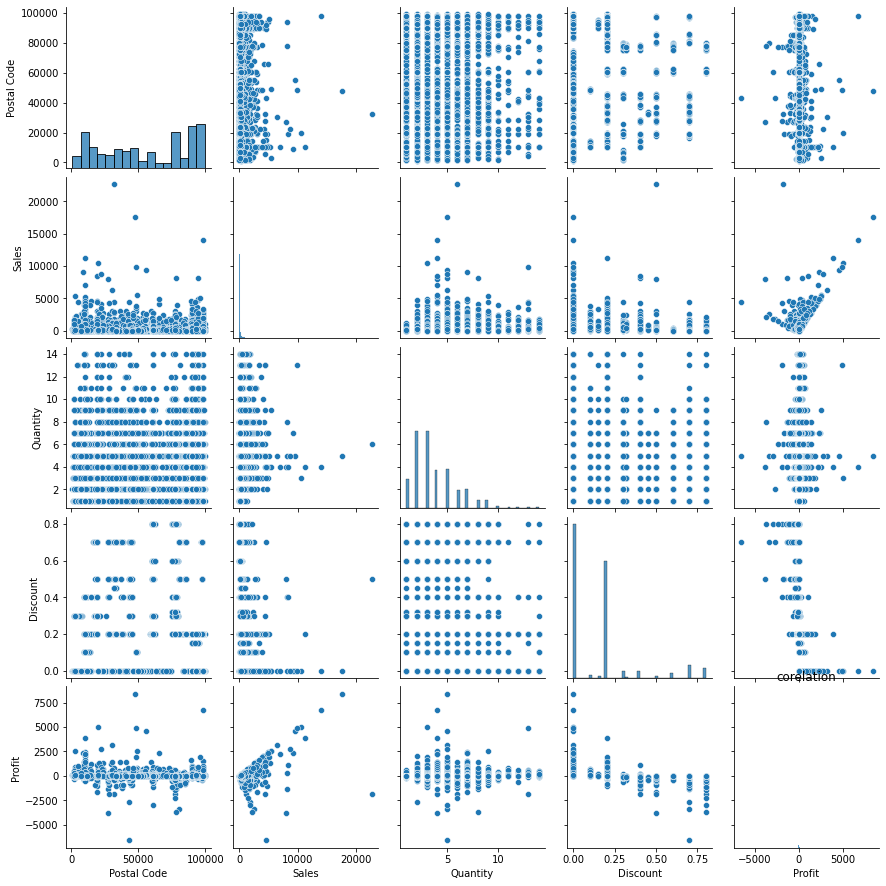

In [7]:
sns.pairplot(df)
plt.title('corelation')
#plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\pair_plot')
plt.show()

this heatmap shows correlation score of each nummerical feature with each other

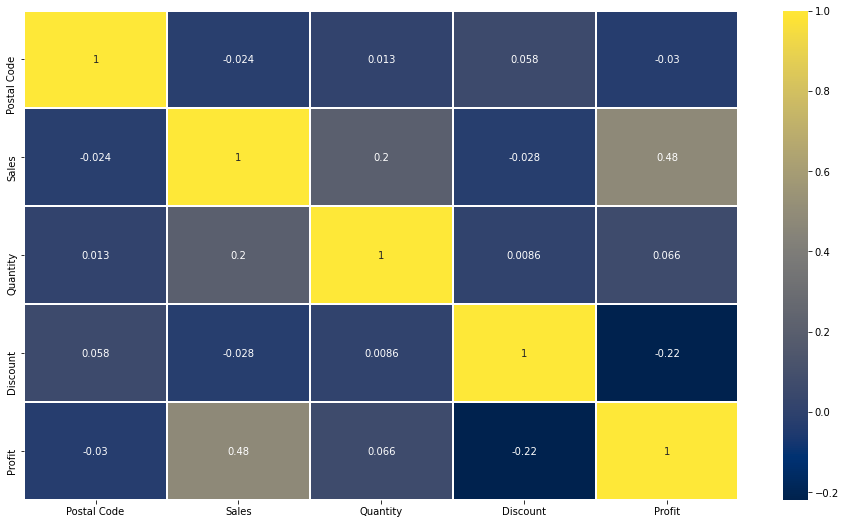

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap ='cividis',linewidth = 0.30, annot = True)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\heatmap')
plt.show()

Dicount and Sales feature are very correlated with targeted feature profit as shown in heatmap and pair plot.discount has reverse relation on profit 

now we have to explore everey feature one by one

### step 6: exploring city feature

#### here i am looking for how many cities in which our sales operations operate

In [11]:
cities=df['City'].unique()

In [12]:
len(cities)

531

#### there are 531 cities in which sales operations operate

## Note:
every row of data represent a sales operation or sales event so i used these terms interchangly

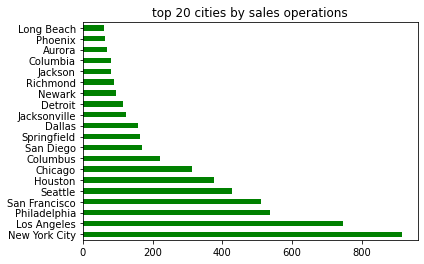

In [13]:
df.City.value_counts()[:20].plot(kind='barh',color='g')
plt.title('top 20 cities by sales operations')
#plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\cities_bar_chart')
plt.show()

new yark city has most sales operations

#### here i am looking for how many cities generating profit and how many cities generating loss

In [14]:
negtive_cities=[]
postive_cities=[]
profit_of_cities=[]
loss_of_cities=[]
for city in df['City'].unique():
    if df['Profit'][df['City']==city].mean()<=0:
        negtive_cities.append(city)
        loss_of_cities.append(df['Profit'][df['City']==city].mean())
    else:
        postive_cities.append(city)
        profit_of_cities.append(df['Profit'][df['City']==city].mean())       

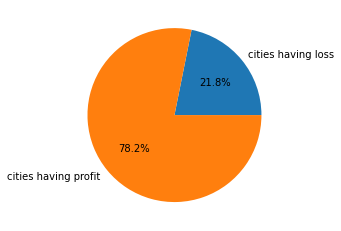

In [15]:
plt.pie([len(negtive_cities),len(postive_cities)],labels=['cities having loss','cities having profit'],autopct='%1.1f%%')
#plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\piechart_cities')
plt.show()

#### this pie chart shows that nearly 78% cities of total cities generating profit and 22% cities of total cities generating loss

In [16]:
len(negtive_cities)

116

there are 116 cities which generating loss

In [17]:
len(postive_cities)

415

there are 415 cities which generating profit

#### here i am looking for which is city is at top with respect to profit and which city is at top with respect to loss

In [18]:
df2=pd.DataFrame(list(zip(postive_cities,profit_of_cities)),columns =['city_name', 'av_profit']).sort_values(by='av_profit', ascending=False)[:20]

In [19]:
df3=pd.DataFrame(list(zip(negtive_cities,loss_of_cities)),columns =['city_name', 'av_loss']).sort_values(by='av_loss', ascending=False)[:20]

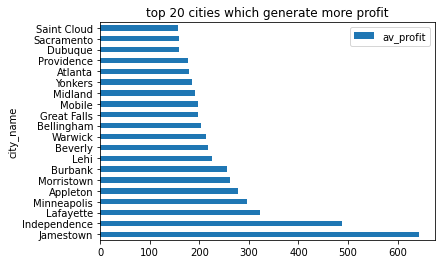

In [20]:
df2.plot(kind='barh',x="city_name",y="av_profit")
plt.title('top 20 cities which generate more profit')
#plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\positive_cities')
plt.show()

#### bar chart  shows that jamestown city generates more profit

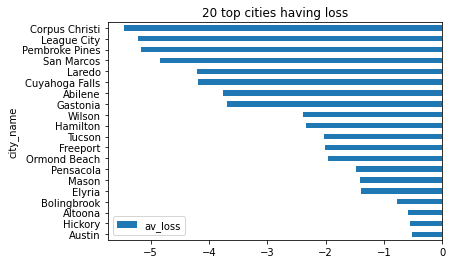

In [22]:
df3.plot(kind='barh',x="city_name",y="av_loss")
plt.title('20 top cities having loss')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\negative_cities')
plt.show()

##### above bar chart chows that Corpus Christi is top city with regording to loss

### step 7: exploring state feature

#### here i am looking for how many states in which our sales operations operate

In [23]:
states=df['State'].unique()

In [24]:
len(states)

49

thre are total 49 states

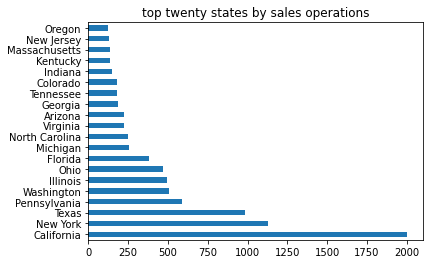

In [25]:
df.State.value_counts()[:20].plot(kind='barh')
plt.title('top twenty states by sales operations')
plt.show()

##### calofornia is top state with respect to sales operations

#### here i am looking for how many states generating profit and how many states generating loss

In [26]:
negtive_states=[]
postive_states=[]
profit_of_states=[]
loss_of_states=[]
for state in df['State'].unique():
    if df['Profit'][df['State']==state].mean()<=0:
        negtive_states.append(state)
        loss_of_states.append(df['Profit'][df['State']==state].mean())
    else:
        postive_states.append(state)
        profit_of_states.append(df['Profit'][df['State']==state].mean())

In [27]:
len(negtive_states)

10

thare are 10 states which generating loss

In [28]:
len(postive_states)

39

there are 39 states which generating profit

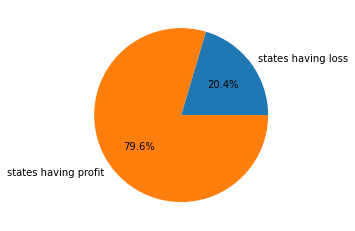

In [29]:
plt.pie([len(negtive_states),len(postive_states)],labels=['states having loss','states having profit'],autopct='%1.1f%%')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\piechart_states')
plt.show()

#### this pie chart shows that nearly 80% states of total states generating profit and 20% states of total states generating loss

#### here i am looking for which state is at top with respect to profit and which state is at top with respect to loss

In [30]:
df4=pd.DataFrame(list(zip(postive_states,profit_of_states)),columns =['state_name', 'av_profit']).sort_values(by='av_profit', ascending=False)[:20]
# df4

In [31]:
df5=pd.DataFrame(list(zip(negtive_states,loss_of_states)),columns =['state_name', 'av_loss']).sort_values(by='av_loss', ascending=False)[:20]
# df5

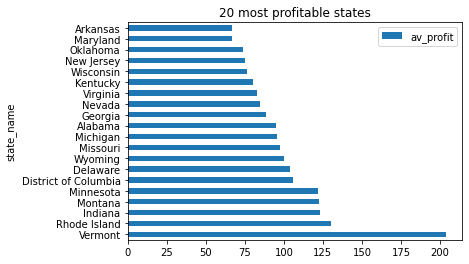

In [32]:
df4.plot(kind='barh',x="state_name",y="av_profit")
plt.title('20 most profitable states')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\postive_states')
plt.show()

#### above bar chart shows that Vermont state is top state which generate more profit

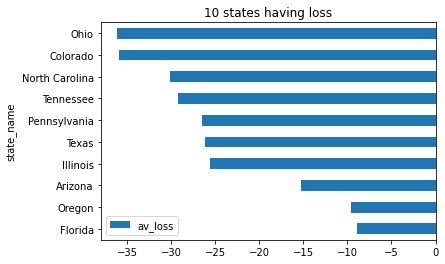

In [34]:
df5.plot(kind='barh',x="state_name",y="av_loss")
plt.title('10 states having loss')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\negative_states')
plt.show()

#### above bar chart shows that ohio state is top state which generate more loss

### step 8: exploring country feature

In [35]:
df['Country'].unique()

array(['United States'], dtype=object)

as there is only one and unique country united states which involved in sales operations

### step 9: exploring Category feature

#### here i am looking for which Category of things is at top with respect to investment and which Category of things is at top with respect to generating more profit

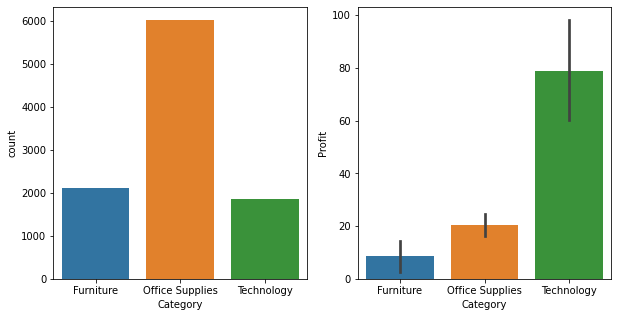

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Category',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Category',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\catagary.png')
plt.show()

#### left bar chart shows that things of office Category are sold items in most sales operations

#### right bar chart shows that things of technology Category are those sold items which generates more profit

#### result: technology items are less sold but more profitable 

### step 9: exploring Ship Mode feature

#### here i am looking for which type of ship mode is mostly used in sales events and how it affects profit

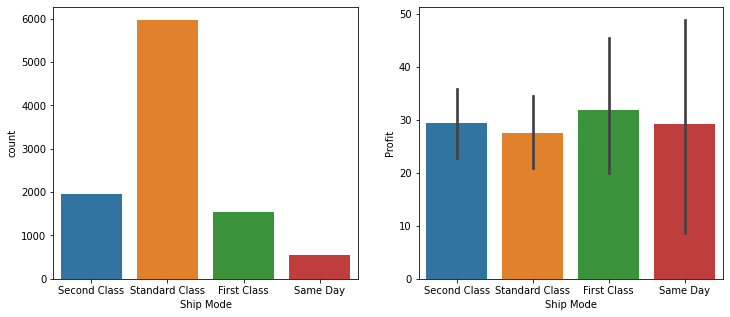

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Ship Mode',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Ship Mode',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\ship_mode.png')
plt.show()

#### left bar chart shows that standard class is used in most sales operations 

#### right bar chart shows that every class of ship mode have same effect on profit

#### result: no more difference with respect to profit so ship mode does  not disturb profit

### step 10: exploring segment feature

#### here i am looking for which type of segment is used in most sales events and which type of segment generates more profit

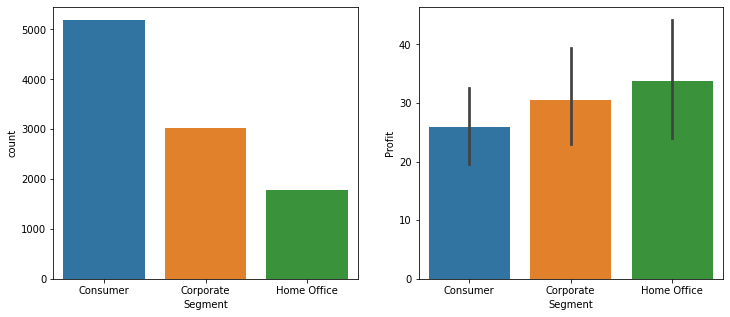

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Segment',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\segment.png')
plt.show()

here a reverse relation is observed as shown in above two bar charts

left bar chart shows that consumer type of segment is used in most sales operations

right bar chart shows that home office type of segment generates more profit

### step 11: exploring region feature

here i am looking for in which region sales operations occured most and which region generates more profit

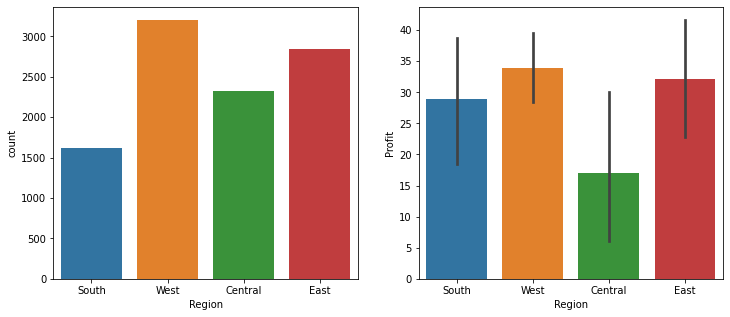

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Region',data=df)
plt.subplot(1, 2, 2)
sns.barplot(x='Region',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\region.png')
plt.show()

left bar chart shows that most of the sales operations occured in West region

right bar chart shows that west region generates more profit but central region generate very less profit

### step 12: exploring  Sub-Category feature

##### here i am looking for things having which Sub-Category is used in most sales operations and things having which Sub-Category generates more profit

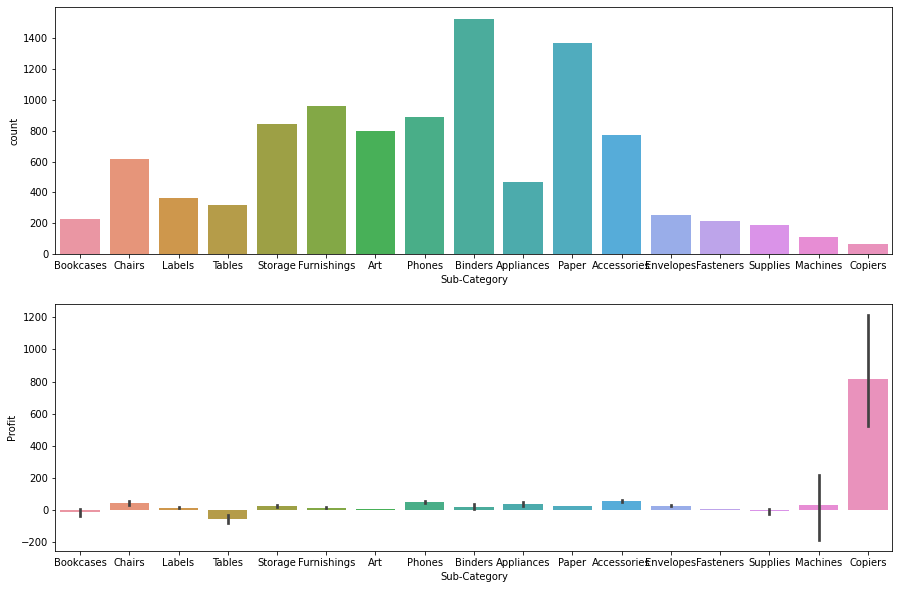

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(x='Sub-Category',data=df)
plt.subplot(2, 1, 2)
sns.barplot(x='Sub-Category',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\sub_catagory.png')
plt.show()

upper bar chart shows that things having binders Sub-Category is used most sales operations 

lower bar chart shows that things having Sub-Category of Copiers generates more profit
,things having Sub-Category of tables and machines generates loss and all things belonging to remaining Sub-Category generates very less profit

### step 13: exploring quantity feature

##### here i am looking for things of how many quantity is used in most sales operations and things things of how many quantity generates more profit

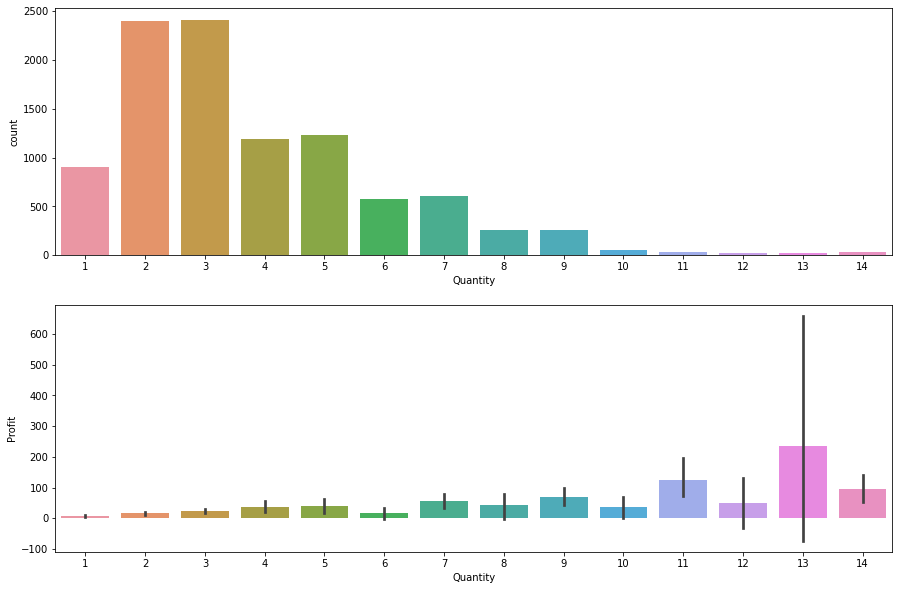

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
sns.countplot(x='Quantity',data=df)
plt.subplot(2, 1, 2)
sns.barplot(x='Quantity',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\quantity.png')
plt.show()

upper bar chart shows that things of quantity 2 and 3 is used in most sales operations

lower bar chart shows that things of quantity 11 and 13 generates more profit

#### here i am looking for if quantity of things is increased than it effects profit whether profit increased or decreased?

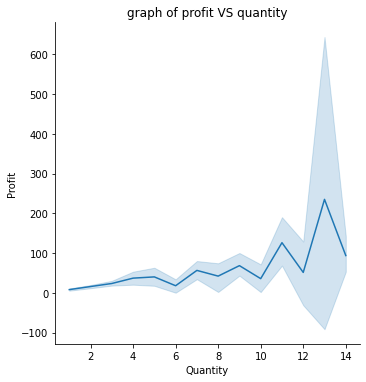

In [45]:
#plt.figure()
sns.relplot(x="Quantity",y="Profit",data=df,kind='line')
plt.title('graph of profit VS quantity')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\quantity_graph.png')
plt.show()

#### by looking on this graph it shown that if quantity of things is increasing than normally profit is also increasing so there is positive relation between quantity and profit but up and down are occured here

### step 14: exploring discount feature

##### here i am looking for that in most sales operations how many percent of discount is offered and on how many discount generates more profit

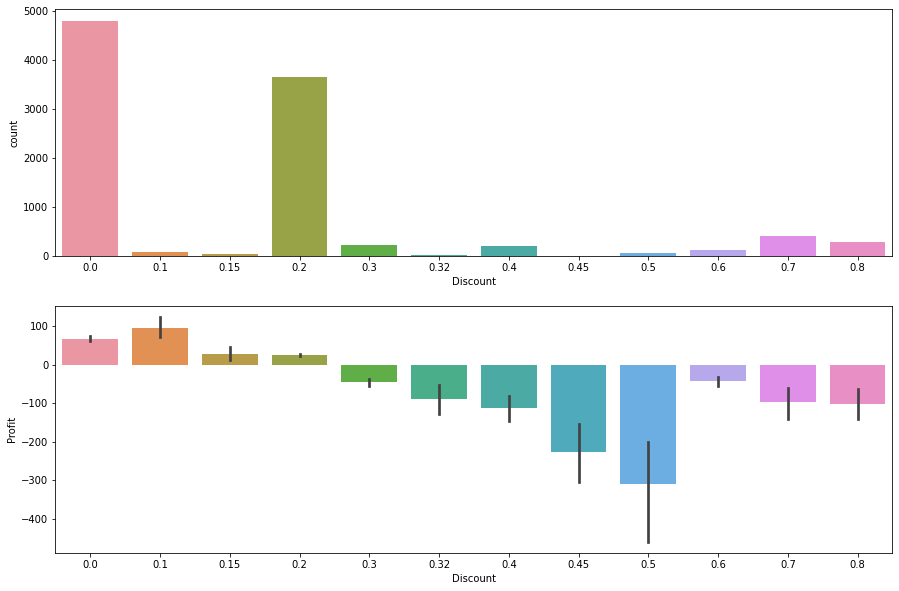

In [46]:
plt.figure(figsize=(15,10))
plt.subplot(2,1, 1)
sns.countplot(x='Discount',data=df)
plt.subplot(2,1, 2)
sns.barplot(x='Discount',y='Profit',data=df)
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\discount.png')
plt.show()

In [47]:
#### upper chart shows that in most sales operations no discount is offered 

#### lower chart shows that if discount is 10 percent than it generates more profit but if discount is 15% or 20% it generates less profit if discount is increasing more than 20 % it generates loss  

#### here i am looking that what is relation between profit and discount 

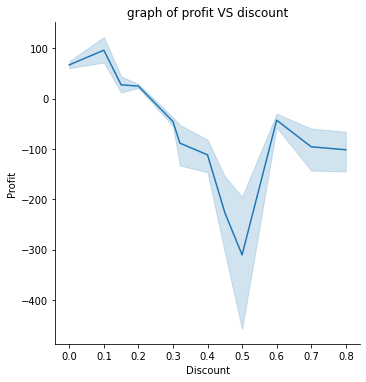

In [48]:
#plt.figure()
sns.relplot(x="Discount",y="Profit",data=df,kind='line')
plt.title('graph of profit VS discount')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\discount_graph.png')
plt.show()

#### this graph shows the negative relationship between discount and profit it means that generally if discount is increasing than profit is decreasing

### step 15: exploring sales feature

here i am looking for how sales is distributed or what range of sales is performed in most sales operations

c:\users\sk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


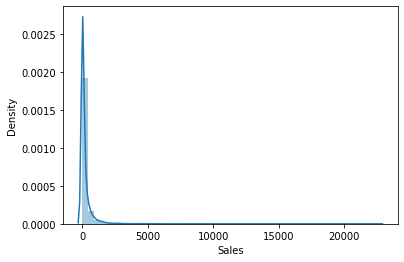

In [49]:
sns.distplot(df['Sales'])
plt.show()

this histogram shows that most of sales operations are performed near to 0 sales

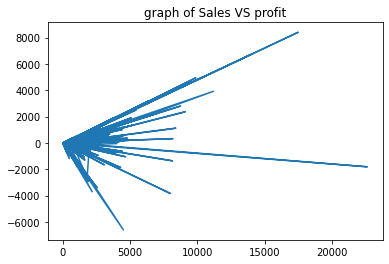

In [51]:
plt.plot(df["Sales"],df["Profit"])
plt.title('graph of Sales VS profit')
# plt.savefig(r'E:\data analytics at Sparks Foundation\tasks-3_EDA_super_store\sales_graph')
plt.show()

this graph shows arbitrary relation between sales and profit it means that increasing in sales profit is either increased or decreased

#### result: sales leads to profit as well as loss

_____________________________________________

<h2 style="color:blue"> Conclusions</h2> <h3 style="color:green">these are 8 recommendations or suggestions to generate more profit</h3>

<h3 style="color:purple">1.Discount </h3>we have to limit our discount from 0 % to 10%
<h3 style="color:purple">2.Category </h3>We have to increase in sales of that things which comes under technology Category
<h3 style="color:purple">3.sub-Category </h3>We have to increase in sales of that things which comes under Copiers Category
<h3 style="color:purple">4.Segment </h3>We have to choose home office segment to generates more profit
<h3 style="color:purple">5.Quantity </h3>Quantity of items should be in between 1 to 11
<h3 style="color:purple">6.sales </h3>We have to increase our sale to take more profit but must following other instructions in mind otherwise loss is also happen
<h3 style="color:purple">7.Cities and states </h3> there are 116 cities and 10 states which generates loss so we have to reduce our sales operations in these cities and states
<h3 style="color:purple">8.region </h3> central region generates very less profit so we have to reduce our sales operations in central region